# NetworkX


## Installing NetworkX


If you are running this notebook online (in Google Colaboratory, for example), you can install NetworkX by running the following command:


In [97]:
# !pip install networkx
# !pip install community

In [ ]:
import community
import matplotlib.pyplot as plt
import networkx as nx
import random

from networkx.algorithms import bipartite

## 3. Basic Concepts


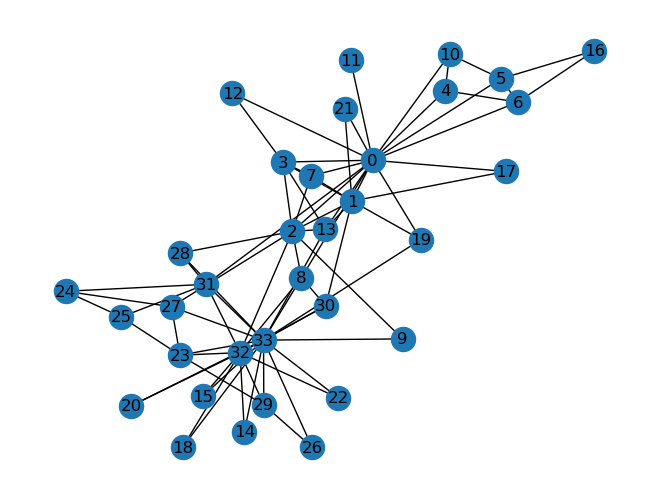

In [99]:
graph_karate = nx.karate_club_graph()

nx.draw(graph_karate, with_labels=True)
plt.show()

### A) Degree


The degree of a node in a network is the number of edges that it is connected to. In a network with $N$ nodes and $M$ edges, the degree $k_i$ of a node $i$ is defined as:

$$ k*i = \sum*{j=1}^M A\_{ij} $$

where $A$ is the adjacency matrix of the network, with $A_{ij} = 1$ if there is an edge connecting nodes $i$ and $j$, and $A_{ij} = 0$ otherwise.

The neighborhood of a node $i$ is the set of nodes that are directly connected to $i$ by an edge. The neighborhood of $i$ is denoted as $N_i$ and is defined as:

$$ N*i = \{j \mid A*{ij} = 1\} $$

where $A$ is the adjacency matrix of the network, with $A_{ij} = 1$ if there is an edge connecting nodes $i$ and $j$, and $A_{ij} = 0$ otherwise.


In [100]:
node = 2
neighborhood = list(nx.neighbors(graph_karate, node))
neighborhood

[0, 1, 3, 7, 8, 9, 13, 27, 28, 32]

In [101]:
# degree = # neighbor
len(neighborhood)

10

In [102]:
# Degree
graph_karate.degree(node)

10

In [103]:
# All degrees
dict(graph_karate.degree)

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

### B) Triadic closure


Triadic closure refers to the tendency for people who share connections in a social network to become connected, also known as the "friend of a friend" effect.

One measure of triadic closure in a network is the clustering coefficient, which quantifies the degree to which nodes tend to cluster together in triads. The clustering coefficient of a node is defined as the fraction of the node's neighbors that are also neighbors of each other. The clustering coefficient of a network is the average clustering coefficient over all nodes in the network.


#### Clustering Coefficient


The clustering coefficient of a node $i$ is given by:

$$C_i = \frac{2e_i}{k_i(k_i-1)}$$

where $e_i$ is the number of edges between the neighbors of node $i$, and $k_i$ is the degree of node $i$ (i.e., the number of edges incident to $i$).


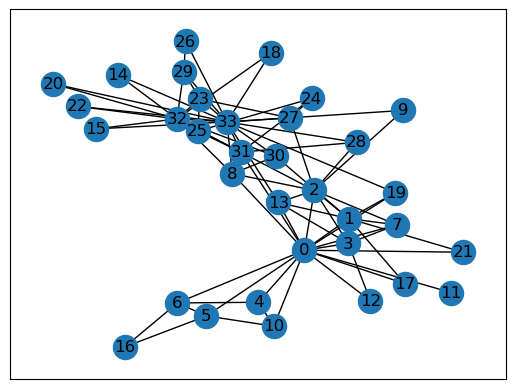

In [104]:
nx.draw_networkx(graph_karate)

In [105]:
# local clustring (if dominator is zero => zero)
nx.clustering(graph_karate, 2)

0.24444444444444444

In [106]:
# list of Clustring Coefficients
nx.clustering(graph_karate)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

##### Global Clustring Coefficient


Many observed social networks are more clustered than would arise at random


The clustering coefficient of the network is the average of the clustering coefficients of all nodes:

$$C = \frac{1}{N}\sum_{i=1}^{N} C_i$$

where $N$ is the total number of nodes in the network.


In [107]:
# Average clustering
nx.average_clustering(graph_karate)

0.5706384782076823

#### Transitivity


Transitivity is a property of a network that measures the likelihood that, if two nodes in the network share a common neighbor, they will also be directly connected to each other. In other words, it measures the tendency for "triangles" to form in the network.

Formally, the transitivity of a network is defined as the ratio of the number of triangles in the network to the number of connected triples of nodes (i.e., triples of nodes that are directly connected to each other or share a common neighbor). In mathematical notation, the transitivity of a network is given by:

$$
T = \frac{3 \times \text{number of triangles}}{\text{number of connected triples}}
$$

A high transitivity indicates that nodes in the network tend to form clusters or communities, while a low transitivity indicates that the network is more of a random or decentralized structure. Transitivity is closely related to the concept of clustering coefficient, which measures the tendency for nodes to form local clusters or neighborhoods.


In [108]:
# transitivity
# transitivity weights nodes with large degree higher
nx.transitivity(graph_karate)

0.2556818181818182

### C) Path


A path between two nodes $A$ and $B$ in a network is a sequence of nodes $A, X_1, X_2, ..., X_n, B$ and a sequence of edges $(A, X_1), (X_1, X_2), ..., (X_n, B)$, where each node and edge in the sequence is adjacent to the previous and next node or edge in the sequence.


The length of a path is the number of edges in the path. A path with length 1 is an edge between two nodes, while a path with length 2 is a sequence of two edges and three nodes, and so on. The shortest path between two nodes is the path with the minimum length that connects them.


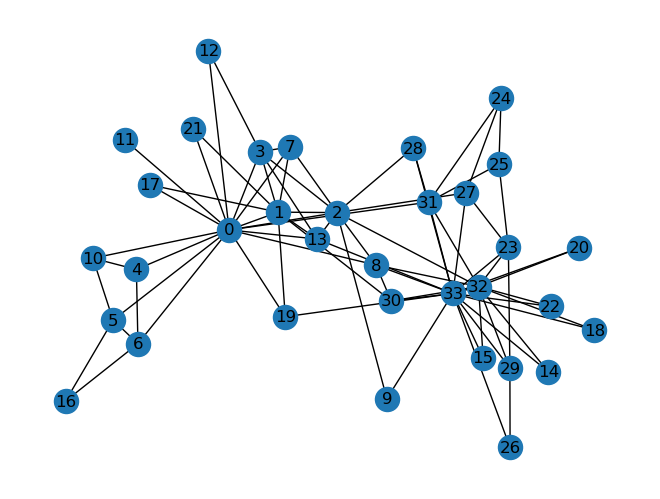

In [109]:
nx.draw(graph_karate, with_labels=True)

In [110]:
# Generate all simple paths between nodes 1 and 3
paths = nx.all_simple_paths(graph_karate, source=1, target=3)

# Print the first 10 simple paths
for _ in range(10):
    print(next(paths))

[1, 0, 2, 3]
[1, 0, 2, 7, 3]
[1, 0, 2, 8, 30, 32, 14, 33, 13, 3]
[1, 0, 2, 8, 30, 32, 15, 33, 13, 3]
[1, 0, 2, 8, 30, 32, 18, 33, 13, 3]
[1, 0, 2, 8, 30, 32, 20, 33, 13, 3]
[1, 0, 2, 8, 30, 32, 22, 33, 13, 3]
[1, 0, 2, 8, 30, 32, 23, 25, 24, 27, 33, 13, 3]
[1, 0, 2, 8, 30, 32, 23, 25, 24, 31, 28, 33, 13, 3]
[1, 0, 2, 8, 30, 32, 23, 25, 24, 31, 33, 13, 3]


In [111]:
path1 = next(paths)
# check if a path is valid in the graph
is_valid = nx.is_simple_path(
    graph_karate, path1
)  # A simple path is a path that does not contain any repeated nodes.
print("Is valid path?", is_valid)

Is valid path? True


In [112]:
# a False example
nx.is_simple_path(graph_karate, [0, 8, 5])

False

In [113]:
# compute the edge list of a walk
edge_list = [
    (path1[i], path1[i + 1]) for i in range(len(path1) - 1)
]  # len(Path1)-1=length of a path
edge_list

[(1, 0),
 (0, 2),
 (2, 8),
 (8, 30),
 (30, 32),
 (32, 23),
 (23, 25),
 (25, 31),
 (31, 24),
 (24, 27),
 (27, 33),
 (33, 13),
 (13, 3)]

In [114]:
# compute the weight of a walk
weight = sum(
    graph_karate[u][v]["weight"] for u, v in edge_list if "weight" in graph_karate[u][v]
)
print("Weight of walk:", weight)

Weight of walk: 52


### D) Cycle


In [115]:
# Find all cycles in the graph
cycles = nx.simple_cycles(graph_karate)
list(cycles)

[[0, 4, 6],
 [0, 4, 6, 5],
 [0, 4, 6, 5, 10],
 [0, 4, 6, 16, 5],
 [0, 4, 6, 16, 5, 10],
 [0, 4, 10],
 [0, 4, 10, 5],
 [0, 4, 10, 5, 6],
 [0, 4, 10, 5, 16, 6],
 [0, 5, 6],
 [0, 5, 6, 4, 10],
 [0, 5, 10],
 [0, 5, 10, 4, 6],
 [0, 5, 16, 6],
 [0, 5, 16, 6, 4, 10],
 [0, 6, 4, 10],
 [0, 6, 5, 10],
 [0, 6, 16, 5, 10],
 [4, 6, 5, 10],
 [4, 6, 16, 5, 10],
 [16, 5, 6],
 [0, 1, 2],
 [0, 1, 2, 3],
 [0, 1, 2, 3, 7],
 [0, 1, 2, 3, 12],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 13, 33, 8],
 [0, 1, 2, 3, 13, 33, 8, 30, 32, 23, 25, 24, 31],
 [0, 1, 2, 3, 13, 33, 8, 30, 32, 23, 25, 31],
 [0, 1, 2, 3, 13, 33, 8, 30, 32, 23, 27, 24, 25, 31],
 [0, 1, 2, 3, 13, 33, 8, 30, 32, 23, 27, 24, 31],
 [0, 1, 2, 3, 13, 33, 8, 30, 32, 29, 23, 25, 24, 31],
 [0, 1, 2, 3, 13, 33, 8, 30, 32, 29, 23, 25, 31],
 [0, 1, 2, 3, 13, 33, 8, 30, 32, 29, 23, 27, 24, 25, 31],
 [0, 1, 2, 3, 13, 33, 8, 30, 32, 29, 23, 27, 24, 31],
 [0, 1, 2, 3, 13, 33, 8, 30, 32, 31],
 [0, 1, 2, 3, 13, 33, 8, 32, 23, 25, 24, 31],
 [0, 1, 2, 3, 13, 33, 8, 32, 

### E) Geodesic


A geodesic between two nodes $A$ and $B$ in a network is the shortest path that connects them. In other words, it is the path with the minimum number of edges that must be traversed to get from node $A$ to node $B$. The length of a geodesic is the number of edges in the path.


In [116]:
# graph_karateeodesic = shortest path
nx.shortest_path(graph_karate, 1, 2)

[1, 2]

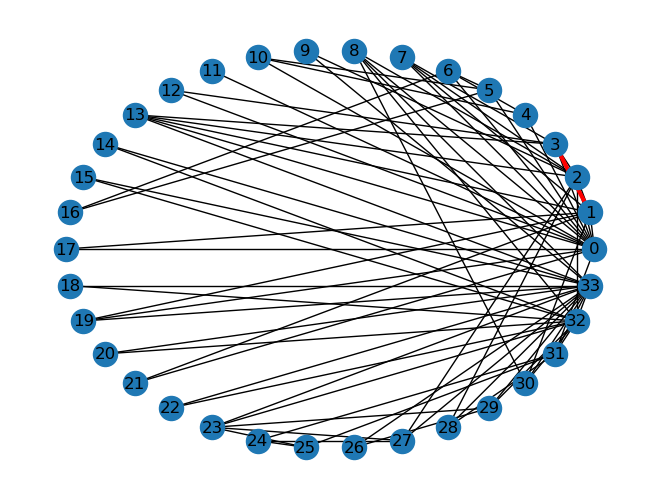

In [117]:
# compute a shortest path between two nodes
path = nx.shortest_path(graph_karate, source=1, target=3)

# compute the corresponding edges of the path
edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]

# draw the graph and the path
pos = nx.circular_layout(graph_karate)
nx.draw(graph_karate, pos, with_labels=True)
nx.draw_networkx_edges(graph_karate, pos, edgelist=edges, edge_color="r", width=3)

In [118]:
# graph_karateeodesic length
nx.shortest_path_length(graph_karate, 1, 2)

1

Finding the Geodesic from node i to every other node is computationaly complex, so we need an effeicient algorithm to do so.

Here we use breadth-first search:


[(1, 0),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 31),
 (2, 9),
 (2, 27),
 (2, 28),
 (2, 32),
 (13, 33),
 (5, 16),
 (31, 24),
 (31, 25),
 (27, 23),
 (32, 14),
 (32, 15),
 (32, 18),
 (32, 20),
 (32, 22),
 (32, 29),
 (33, 26)]

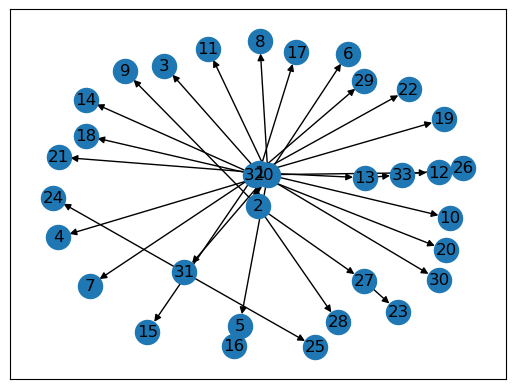

In [119]:
# breadth-first search algorithm
graph_tree = nx.bfs_tree(graph_karate, 1)
nx.draw_networkx(graph_tree, with_labels=True)
list(graph_tree.edges())

In [120]:
# all shortest path
nx.shortest_path_length(graph_karate, 1)  # outputs a dictionary

{1: 0,
 0: 1,
 2: 1,
 3: 1,
 7: 1,
 13: 1,
 17: 1,
 19: 1,
 21: 1,
 30: 1,
 4: 2,
 5: 2,
 6: 2,
 8: 2,
 10: 2,
 11: 2,
 12: 2,
 31: 2,
 9: 2,
 27: 2,
 28: 2,
 32: 2,
 33: 2,
 16: 3,
 24: 3,
 25: 3,
 23: 3,
 14: 3,
 15: 3,
 18: 3,
 20: 3,
 22: 3,
 29: 3,
 26: 3}

In [121]:
# Average shortest path
nx.average_shortest_path_length(graph_karate)

2.408199643493761

### F) Eccentricity


The eccentricity of a node $u$ in a network is the maximum distance between $u$ and any other node in the network. In other words, it is the maximum length of the shortest path between $u$ and any other node. The eccentricity of a network is the maximum eccentricity of any node in the network.


In [122]:
# Eccentricity
# the largest distance between n and all ohter nodes:
nx.eccentricity(graph_karate)

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 3,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 5,
 17: 4,
 18: 5,
 19: 3,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 4,
 25: 4,
 26: 5,
 27: 4,
 28: 4,
 29: 5,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

In [123]:
# Diameter: max Eccentricity between two nodes in whole network (max max)
nx.diameter(graph_karate)

5

In [124]:
# Diameter is max eccentricity
max(nx.eccentricity(graph_karate).values())

5

In [125]:
# radius: min Eccentricity between two nodes in whole network (min max)
nx.radius(graph_karate)

3

In [126]:
# radius is min eccentricity
min(nx.eccentricity(graph_karate).values())

3

In [127]:
# periphery
# Eccentricity=diameter
nx.periphery(graph_karate)

[14, 15, 16, 18, 20, 22, 23, 26, 29]

In [128]:
# the center of a graph : Eccentricity=radius
nx.center(graph_karate)

[0, 1, 2, 3, 8, 13, 19, 31]

### G) Connectivity


##### Built in Dataset


NetworkX provides several built-in network datasets that can be used for testing and experimentation. These datasets are available in the NetworkX library itself and can be loaded using functions that start with the prefix `nx.` followed by the name of the dataset.

Here are some examples of the built-in network datasets in NetworkX:

- `nx.karate_club_graph()` - Returns the Zachary's Karate Club network, a social network of a karate club, where each node represents a member of the club, and each edge represents a friendly relationship between members.

- `nx.les_miserables_graph()` - Returns a network of characters in the novel "Les Miserables" by Victor Hugo, where each node represents a character in the novel, and each edge represents a co-occurrence of two characters in a chapter.

- `nx.davis_southern_women_graph()` - Returns a network of the social interactions between women in a southern US town in the 1930s, where each node represents a woman, and each edge represents a social relation between two women.

These are just a few examples of the built-in network datasets in NetworkX. You can find more information about the available datasets and their usage in the NetworkX documentation.


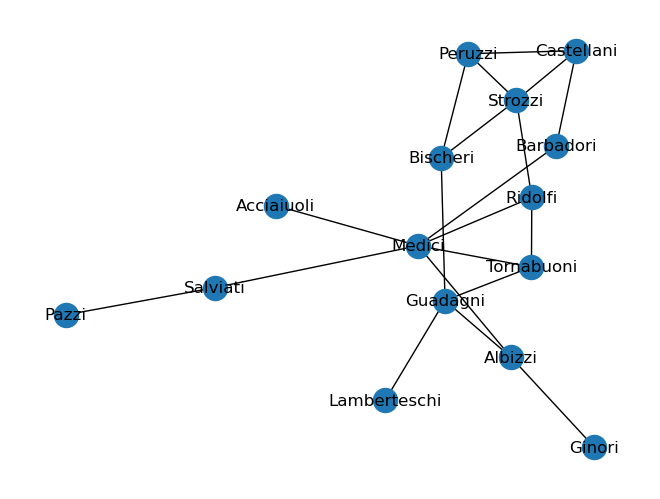

In [137]:
# An example
graph_families = nx.florentine_families_graph()
nx.draw(graph_families, with_labels=True)

#### The Karate Club graph


The Karate Club graph is a social network representing friendships among 34 members of a karate club, as observed by Wayne W. Zachary in 1977. Each node in the graph represents a member of the club, and each edge represents a friendship between two members. The graph has 34 nodes and 78 edges.

The Karate Club is a well-known example in social network analysis and has been used to study various network properties, such as community structure and centrality measures. The graph is characterized by a split in the club into two factions, led by the club instructor (node 0) and one of the members (node 33), respectively. This split was caused by a dispute between the two leaders, which eventually led to the formation of two separate karate clubs.


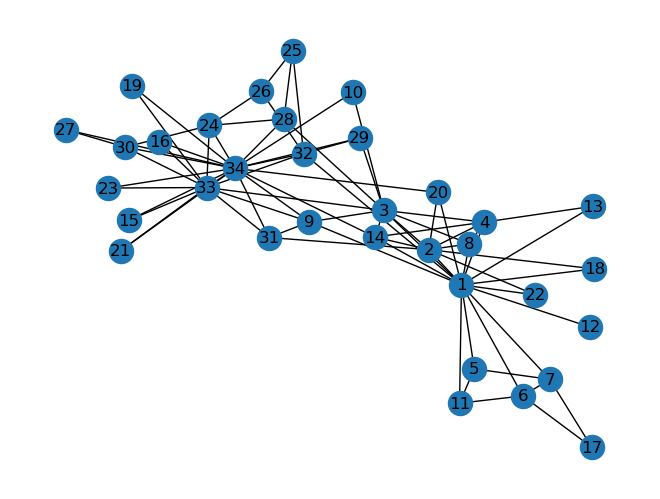

In [138]:
# Karate Club
graph_karate = nx.karate_club_graph()
graph_karate = nx.convert_node_labels_to_integers(graph_karate, first_label=1)
nx.draw(graph_karate, with_labels=True)

the club instructor (node 0) and one of the members (node 33) representation


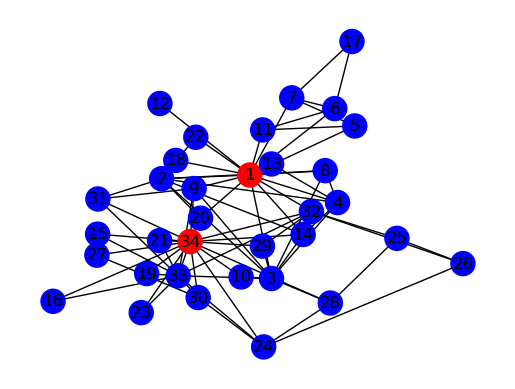

In [131]:
# Set the positions of the nodes using the Kamada-Kawai layout
pos = nx.kamada_kawai_layout(graph_karate)

# Draw the graph with red nodes for node 0 (club instructor) and node 33 (member) : they are now 1 and 34
red_nodes = [1, 34]
node_colors = ["red" if node in red_nodes else "blue" for node in graph_karate.nodes()]
nx.draw_networkx_nodes(graph_karate, pos, node_color=node_colors)
nx.draw_networkx_edges(graph_karate, pos)

# Draw the labels for the nodes
nx.draw_networkx_labels(graph_karate, pos)

# Show the graph
plt.axis("off")
plt.show()

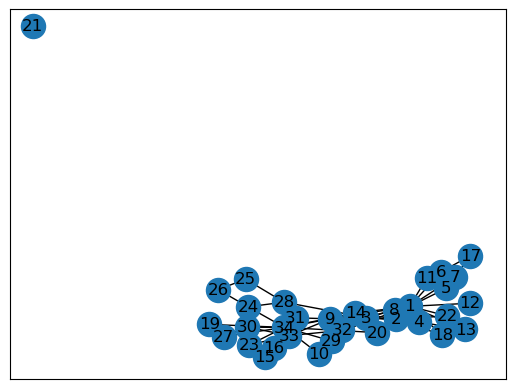

In [132]:
# disconnection based on random selection
while nx.is_connected(graph_karate):
    # delete an edge
    i = random.choice(list(nx.nodes(graph_karate)))
    j = random.choice(list(nx.nodes(graph_karate)))
    if graph_karate.has_edge(i, j):
        graph_karate.remove_edge(i, j)
nx.draw_networkx(graph_karate)

In [133]:
# connectivity
# connected components
nx.number_connected_components(graph_karate)

2

In [134]:
sorted(nx.connected_components(graph_karate))

[{1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34},
 {21}]

In [135]:
# which component  each node belongs?
nx.node_connected_component(graph_karate, 1)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34}

##### connectivity in directed graphs

weakly connected = replacing all directed edges with undirected edges produces a conneceted undirected graph

strongly connected = with directions


In [136]:
# create an empty directed graph
Directed_graph_karate = nx.Digraph_karateraph()

# add nodes to the graph
Directed_graph_karate.add_nodes_from(
    ["Alice", "Bob", "Charlie", "Dave", "Eve", "Adam", "Sarah"]
)

# add directed edges to the graph
Directed_graph_karate.add_edge("Alice", "Bob")
Directed_graph_karate.add_edge("Bob", "Charlie")
Directed_graph_karate.add_edge("Dave", "Eve")
Directed_graph_karate.add_edge("Alice", "Eve")
Directed_graph_karate.add_edge("Eve", "Alice")
Directed_graph_karate.add_edge("Adam", "Sarah")
# Directed_graph_karate.add_edge('Adam','Bob')

# draw the graph
nx.draw(Directed_graph_karate, with_labels=True)

# show the plot
plt.show()

AttributeError: module 'networkx' has no attribute 'Digraph_karateraph'

In [ ]:
# weakly connected
nx.is_weakly_connected(Directed_graph_karate)

In [ ]:
# strongly connected
nx.is_strongly_connected(Directed_graph_karate)

In [ ]:
# weakly connected components
sorted(nx.weakly_connected_components(Directed_graph_karate))

In [ ]:
# strongly connected components
sorted(nx.strongly_connected_components(Directed_graph_karate))

### H) Robustness


network robustness is the ability of a network to maintain its general structral properties when it faces failure or attacks

types of attack: removal of nodes or edges

Robustness = maintain connectivity

examples: airport closure, internet router failures, power line failure


#### Erdős-Rényi random graph


The Erdős-Rényi random graph model is a classic random graph model that generates a graph with a fixed number of nodes, where each pair of nodes is connected with a probability p.


In [ ]:
# create an Erdős-Rényi random network

n = 10  # number of nodes
p = 0.6  # probability of edge creation
ER_graph_karate = nx.erdos_renyi_graph(n, p)

# draw the graph
nx.draw(ER_graph_karate, with_labels=True)

Node connectivity: Minimum number of nodes
needed to disconnect a graph or pair of nodes.

Edge connectivity: Minimum number of edges
needed to disconnect a graph or pair of nodes.

Graphs with large node and edge connectivity are
more robust to the loss of nodes and edges.


In [ ]:
# what is the smallest number of nodes that can be romoved from graph in order to disconnect it?
nx.node_connectivity(ER_graph_karate)

In [ ]:
# which nodes?(the smallest set of nodes that needs to be removed to disconnect the graph)
nx.minimum_node_cut(ER_graph_karate)

In [ ]:
# what is the smallest number of edges that can be romoved from graph in order to disconnect it?
nx.edge_connectivity(ER_graph_karate)

In [ ]:
# which edge(s)?
nx.minimum_edge_cut(ER_graph_karate)

### I) Robustness (specific source and sink)


In [ ]:
# all paths from i to j
sorted(nx.all_simple_paths(ER_graph_karate, 1, 2))

In [ ]:
# Node Connectivity: from i to j
# If we wanted to block the message from i to j by removing nodes from the network, how many
# nodes would we need to remove?
nx.node_connectivity(ER_graph_karate, 1, 2)

In [ ]:
# Which nodes?(the set of nodes we must remove in order to block msg from i to j)
# {} when two nodes are connected!
nx.minimum_node_cut(ER_graph_karate, 1, 2)

#### Edge Connectivity


If we wanted to block the message from i to j by
removing edges from the network, how many
edges would we need to remove?


In [ ]:
nx.edge_connectivity(ER_graph_karate, 1, 2)

In [ ]:
# Which edges?
nx.minimum_edge_cut(ER_graph_karate, 1, 2)